# Prirodni kubični splajn

---

Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku 

$$
a\equiv x_0<x_1<x_2<\cdots <x_n\equiv b
$$ 

i izračunajmo vrijednosti 

$$
y_i=f(x_i), \quad i=0,1,\ldots,n.
$$
 
Na intervalu $[x_{i-1},x_i]$ funkciju $f$ aproksimiramo kubičnim polinomom $C_i$,
tako da je na intervalu $[a,b]$ funkcija $f$ aproksimirana funkcijom 

$$
C(x)=C_i(x), \quad x\in[x_{i-1},x_i]
$$

Od funkcije $C(x)$ tražimo 

* __neprekidnost__
* __neprekidnost prve derivacije__ i
* __neprekidnost druge derivacije__.

Dakle,

\begin{align*}
C_i(x_{i-1})&=y_{i-1}, \quad &i=1,\ldots,n, \\
C_i(x_{i})&=y_{i} \quad & i=1,\ldots, n,\\
C'_i(x_i)&=C'_{i+1}(x_i), \quad &i=1,\ldots,n-1, \\
C'_i(x_i)&=C'_{i+1}(x_i), \quad &i=1,\ldots,n-1,
\end{align*}

pa imamo sustav od $4n-2$ jednadžbe i $4n$ nepoznanica (svaki od $n$ polinoma ima 4 koeficijenta).

Vrijede sljedeće tvrdnje:

$$
C_i(x)=y_{i-1}-s_{i-1}\frac{h_i^2}{6}+b_i(x-x_{i-1})+\frac{s_{i-1}}{6h_i}(x_i-x)^3
+\frac{s_i}{6h_i}(x-x_{i-1})^3,
$$

gdje je 

\begin{align*}
b_i&=d_i-(s_i-s_{i-1})\frac{h_i}{6},\\
d_i&=\frac{y_i-y_{i-1}}{h_i},\\
h_i&=x_i-x_{i-1},
\end{align*}

a brojevi $s_i$, $i=0,1,\ldots,n$, zadovoljavaju sustav jednadžbi 

$$
s_{i-1}h_i+2s_i(h_i+h_{i+1})+s_{i+1}h_{i+1}=6(d_{i+1}-d_i),\quad i=1,\ldots,n-1.
$$

Ako zadamo $s_0$ i $s_n$, sustav će imati jedinstveno rješenje. 

Najčešće su zadani __prirodni uvjeti__:
$$
s_0=0, \quad s_n=0,
$$ 

pa odatle ime __prirodni splajn__.

U tom slučaju, $s_1,\ldots,s_{n-1}$ su rješenja sustava

$$
\begin{bmatrix} 2(h_1+h_2) & h_2 & 0 & \cdots & 0 & 0 \\
h_2 & 2(h_2+h_3) & h_3 & \cdots & 0 & 0 \\
0 & h_3 & 2(h_3+h_4) & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 2(h_{n-2}+h_{n-1}) & h_{n-1} \\
0 & 0 & 0 & \cdots & h_{n-1}  & 2(h_{n-1}+h_{n})\\
\end{bmatrix}
\begin{bmatrix}
s_1\\ s_2 \\ s_3 \\ \vdots \\ s_{n-2} \\ s_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
6(d_2-d_1)\\
6(d_3-d_2)\\
6(d_4-d_3) \\
\vdots \\
6(d_{n-1}-d_{n-2}\\
6(d_n-d_{n-1})
\end{bmatrix}.
$$

Dokaz se nalazi u udžbeniku [Numerička matematika, str. 29][RS04].

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

Matrica sustava je __tridijagonalna__ i __pozitivno definitna__ pa se sustav može riješiti metodom Choleskog (bez pivotiranja) u $O(n)$ operacija. 



Vrijede __ocjene pogreške__:

\begin{align*}
\max |f(x)-C(x)| &\leq \frac{5}{384} \max h_i^4 \\
\max |f'(x)-C'(x)| &\leq \frac{1}{24} \max h_i^3 \\
\max |f''(x)-C''(x)| &\leq \frac{3}{8} \max h_i^2. 
\end{align*}

Ocjene se mogu promatrati i na svakom intervalu posebno.

## Interpolacija slučajnih točaka

In [1]:
using Polynomials
using Plots
include("Vandermonde.jl")

Matrix (generic function with 1 method)

In [2]:
# Generiranje točaka
using Random, LinearAlgebra
Random.seed!(123)
n=5
x=sort(rand(n+1))
y=rand(n+1)

6-element Array{Float64,1}:
 0.5860221243068029
 0.05213316316865657
 0.26863956854495097
 0.10887074134844155
 0.16366581948600145
 0.4730168160953825

In [3]:
function myspline(x,y)
    h=x[2:end]-x[1:end-1]
    d=(y[2:end]-y[1:end-1])./h
    H=SymTridiagonal(2*(h[1:end-1]+h[2:end]),h[2:end-1])
    b₀=6*(d[2:end]-d[1:end-1])
    s=H\b₀
    s=[0;s;0]
    # Definirajmo polinome
    b=d-(s[2:end]-s[1:end-1]).*h/6
    n=length(x)-1
    C=Array{Any}(undef,n)
    C=[xx -> 
        y[i]-s[i]*h[i]^2/6+b[i]*(xx-x[i])+s[i]*(x[i+1]-xx)^3/(6*h[i])+s[i+1]*(xx-x[i])^3/(6*h[i]) 
        for i=1:n]
    return C
end 

myspline (generic function with 1 method)

In [4]:
C=myspline(x,y)

5-element Array{var"#2#4"{Int64,Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{Float64,1}},1}:
 #2 (generic function with 1 method)
 #2 (generic function with 1 method)
 #2 (generic function with 1 method)
 #2 (generic function with 1 method)
 #2 (generic function with 1 method)

In [5]:
# Definirajmo točke za crtanje
lsize=200
xx=range(x[1],x[end],length=lsize)

# Računanje ordinata
function plotspline(C,x,xx)
    ySpline=Array{Float64}(undef,length(xx))
    for i=1:length(xx)
        for k=1:length(C)
            if xx[i]<=x[k+1]
                ySpline[i]=C[k](xx[i])
                break
            end
        end
    end
    return ySpline
end

plotspline (generic function with 1 method)

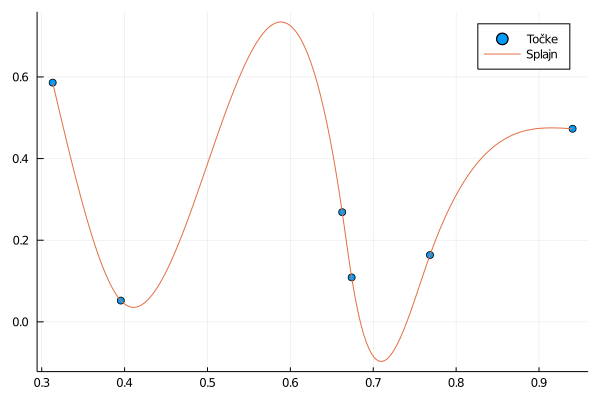

In [6]:
# Crtanje
scatter(x,y,label="Točke")
ySpline=plotspline(C,x,xx)
plot!(xx,ySpline,label="Splajn")

Usporedimo splajn s interpolacijskim polinomom:

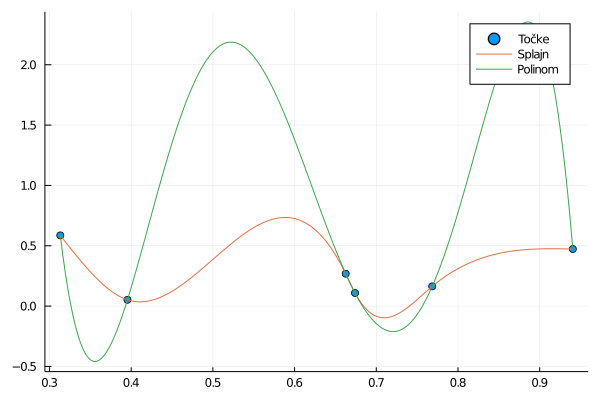

In [7]:
A=Vandermonde(x)
p=Polynomial(A\y)
yPoly=p.(xx)
scatter(x,y,label="Točke")
plot!(xx,[ySpline yPoly],label=["Splajn" "Polinom"])

## Interpolacija funkcije $\sin(x)$

Usporedimo splajn s interpolacijskim polinomom.

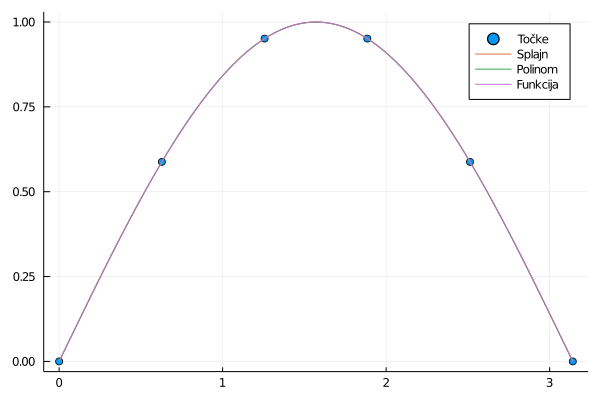

In [8]:
n=5
a=0
b=pi
f(x)=sin.(x)

x=collect(range(a,stop=b,length=n+1))
y=f(x)
lsize=200
xx=collect(range(a,stop=b,length=lsize))

# Polinom
A=Vandermonde(x)
p=Polynomial(A\y)
yPoly=p.(xx)

# Splajn
C=myspline(collect(x),y)
ySpline=plotspline(C,x,xx)

# Funkcija 
yFun=f(xx)

# Crtanje
scatter(x,y,label="Točke")
plot!(xx,[ySpline yPoly yFun],label=["Splajn" "Polinom" "Funkcija"])

## Interpolacija funkcije $f(x)=1-|x-1|$, $x\in[0,2]$

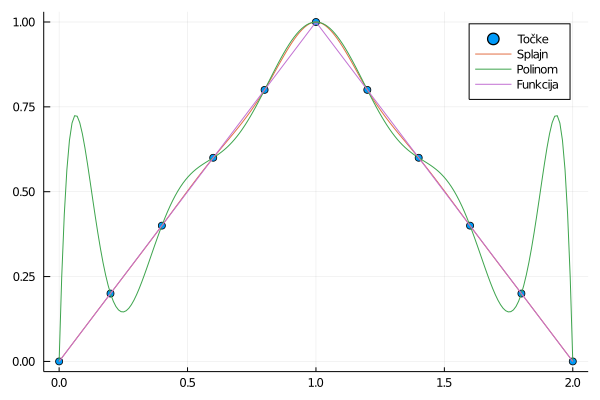

In [9]:
n=10
a=0
b=2
f(x)=1 .-abs.(x .-1)

x=collect(range(a,stop=b,length=n+1))
y=f(x)
lsize=200
xx=collect(range(a,stop=b,length=lsize))

# Polinom
A=Vandermonde(x)
p=Polynomial(A\y)
yPoly=p.(xx)

# Splajn
C=myspline(x,y)
ySpline=plotspline(C,x,xx)

# Funkcija 
yFun=f(xx)

# Crtanje
scatter(x,y,label="Točke")
plot!(xx,[ySpline yPoly yFun],label=["Splajn" "Polinom" "Funkcija"])